# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [34]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [63]:
from sklearn.cluster import KMeans

In [ ]:
### Здесь требуется загрузить датасет phones.csv ###

In [3]:
phones = pd.read_csv("1.8_phones.csv")

In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

In [4]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


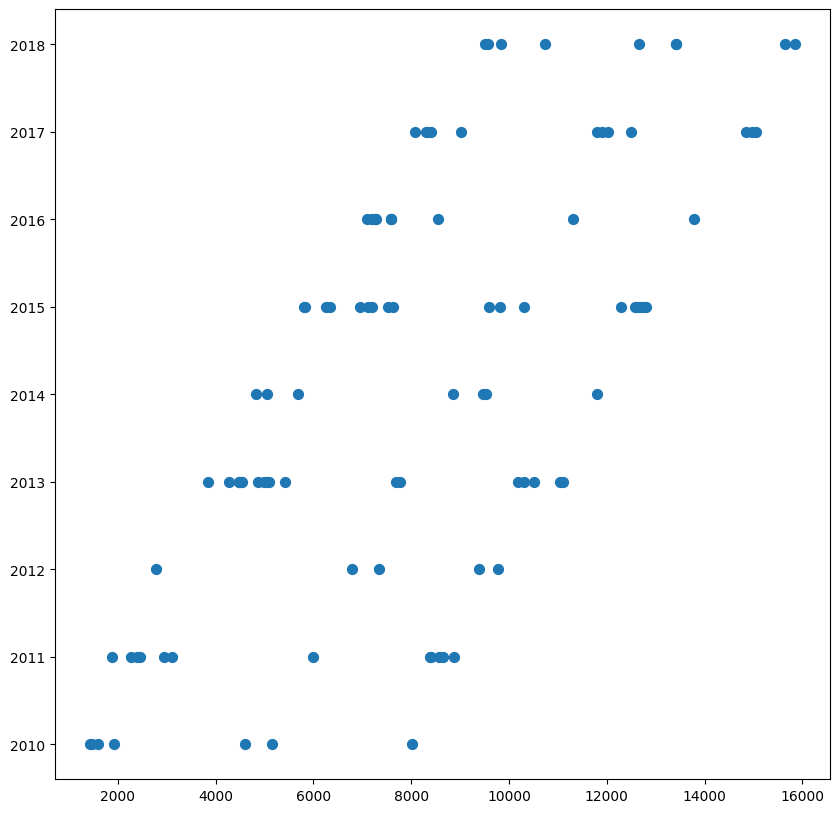

In [9]:
pic = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.scatter(phones["price"], phones["year"], s=50)
plt.show()

Задание 1: обучить модель регрессии

In [21]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk", "year"]]
y = phones["price"]
reg = LinearRegression().fit(X, y)

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [22]:
[b1, b2] = reg.coef_
a = reg.intercept_
def reg_pred(disk, year):
  return a+b1*disk + b2*year

In [26]:
reg_pred(X.disk[0], X.year[0])

7848.046694419114

In [29]:
reg.predict(X[0:1])[0]

7848.046694419114

In [31]:
d1,d2 = list(), list()
for x in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
  for y in np.linspace(min(phones["year"]), max(phones["year"]), 100):
    d1.append(x)
    d2.append(y)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


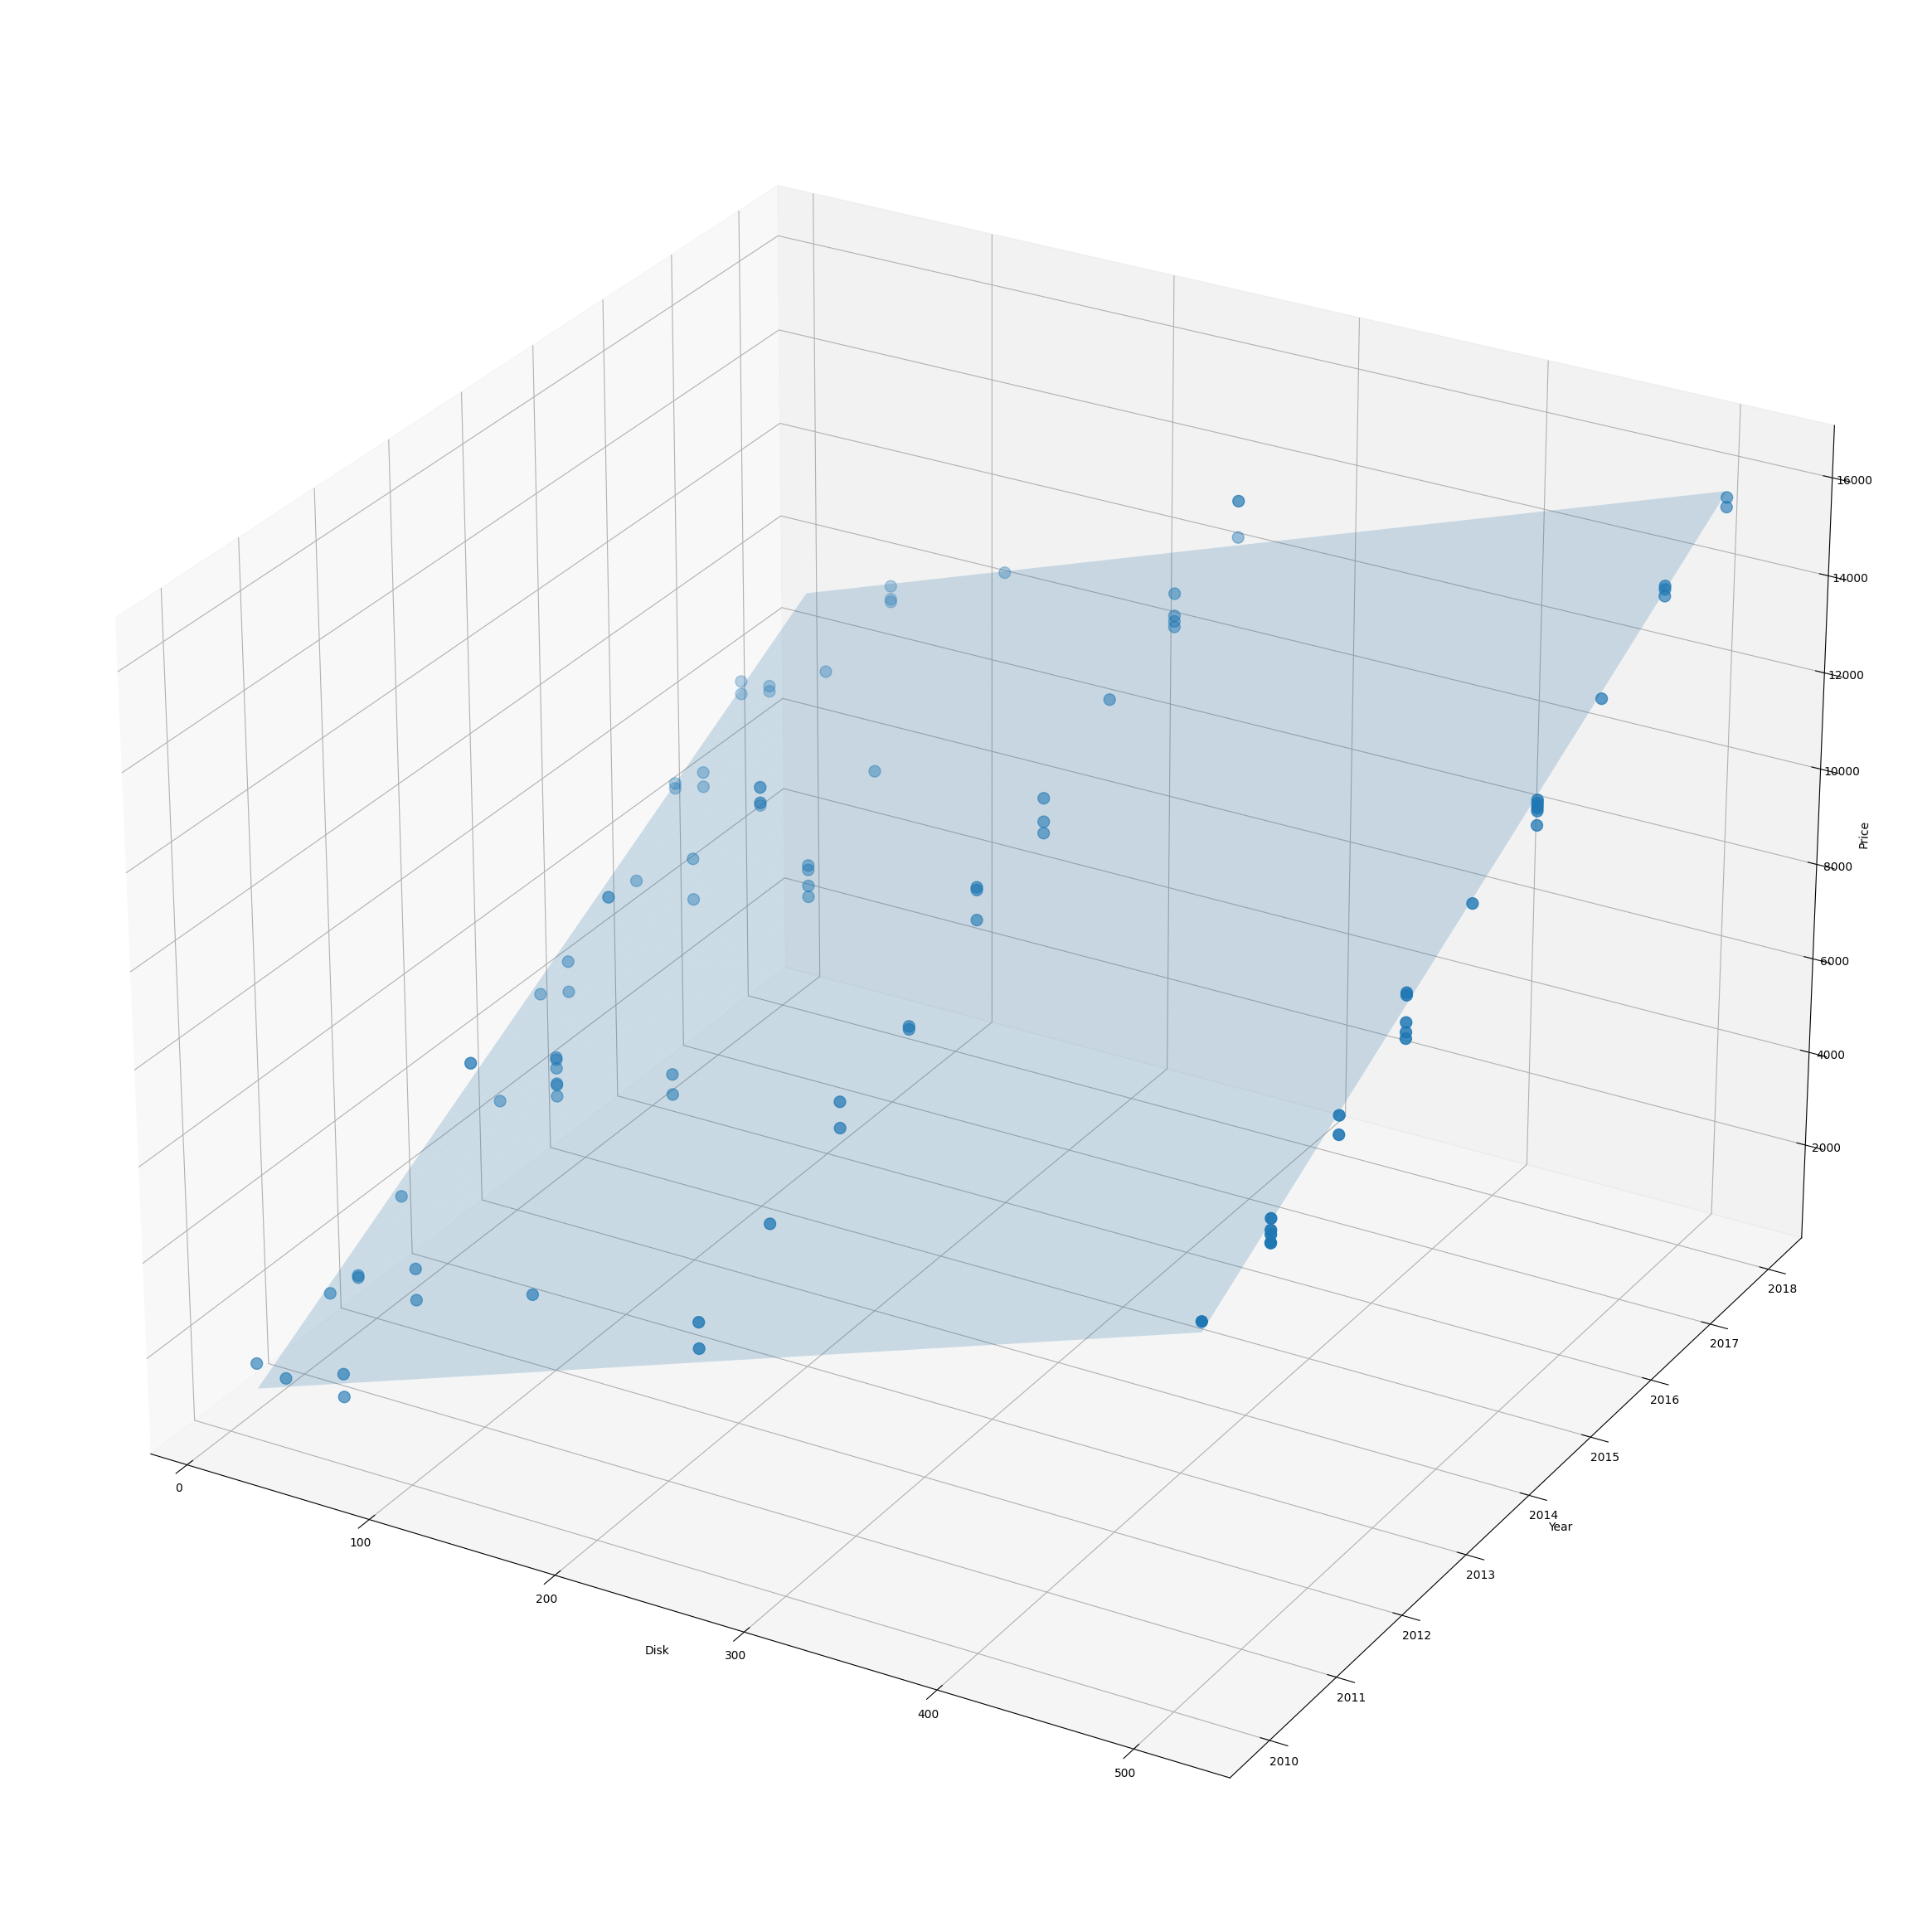

In [37]:
pic = plt.figure(figsize=(30,30))
ax = plt.axes(projection="3d")
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("Disk")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

ax.elev=27
plt.show()

Задание 2: обучить модель классификации

In [41]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk", "year"]]
y = phones["os"]

cl = DecisionTreeClassifier().fit(X,y)

In [42]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [49]:
cl.predict(X[1:8])[4], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

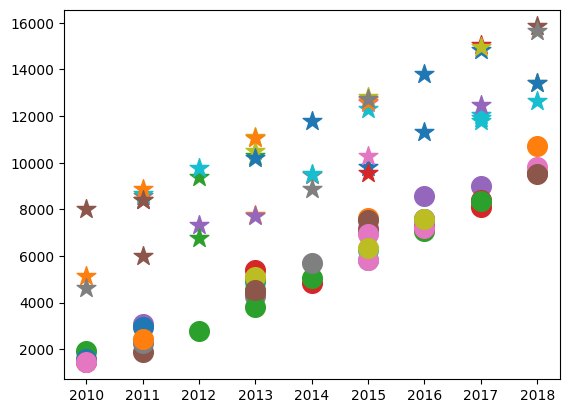

In [73]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = {"Android": "o", "iOS": "*"}
for i,o,l in zip(phones.year, phones.price, phones.os):
  plt.scatter(i,o,s=200,marker=X[l])
plt.show()

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [66]:
X = phones[["year", "price"]]
clust = KMeans(n_clusters=2).fit(X)
[c1, c2] = clust.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


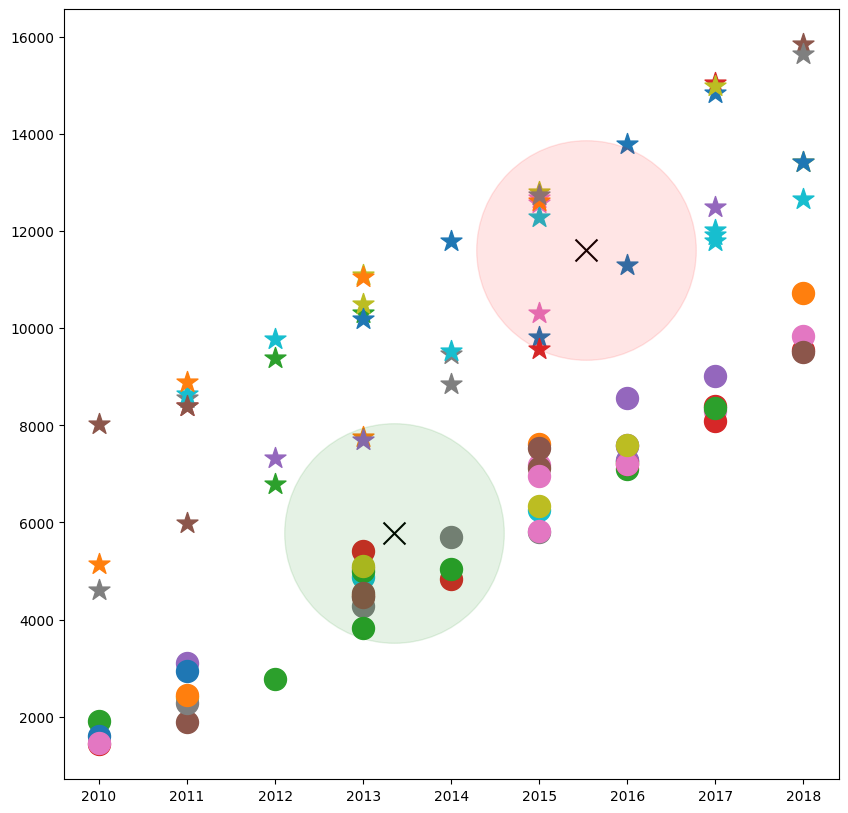

In [81]:
pic = plt.figure(figsize = (10,10))
markers = {"Android": "o", "iOS": "*"}

for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="green", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="red", alpha=0.1)

plt.show()